In [ ]:
# !pip install pyts
# !pip install dtaidistance

# Домашнее задание

1. Генерим 21 сигналов (временных рядов), 3 класса по 7 образцов в каждом. 
Постарайтесь сделать их как можно более похожими, и в тоже время различными. 

1. Рассчитываем расстояние между ними по формуле Евклида и с помощью DTW

1. Описываем кратко полученные значения

1. Формируем из нагенеренных временных рядов набор данных для обучения

1. Разбиваем набор на train и test

1. Обучаем  классификаторы KNN с DTW, KNN со стандартной метрикой расстояния, TimeSeriesForest

1. Описываем кратко полученные результаты

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Генерация сигнала

1 тип - гармонический (косинус)

2 тип - модифицированный синус

3 тип - пульс - сигнал

Для выполнения дз надо нагенерить 21 сигнал, по 7 сигналов каждого типа

In [2]:
def pulse(t):
    """Пульс сигнал"""
    return 1 * (abs(t) < 0.5)

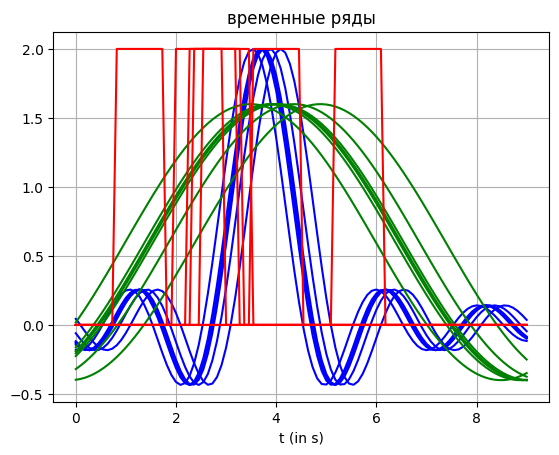

In [29]:
# индекс и отсчет времени в секундах
time_index = np.linspace(0, 9, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)


N = 7 #количество образцов в каждом типе сигналов


# гармонические колебания
f0 = 0.2

for i in range(N):
    tseries_list["Tc"+str(i)]= -np.cos(np.pi*f0*time_index + d[i]) + 0.6

# модифицированный синус 
for i in range(N):
    tseries_list["Ts"+str(i)]= 2*np.sin(np.pi*time_index+ 2*d[i]-13) /(np.pi*time_index+ 2*d[i]-13)

# пульс сигнал
for i in range(N):
    tseries_list["Tp"+str(i)]= 2*pulse(time_index + 5*d[i] - 6)


# отрисовка всех сигналов
for i in range(N):
    plt.plot(time_index, tseries_list["Ts"+str(i)], '-b')
for i in range(N):
    plt.plot(time_index, tseries_list["Tc"+str(i)], '-g')
for i in range(N):
    plt.plot(time_index, tseries_list["Tp"+str(i)], '-r')
            
plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()

# Понимание Динамическое искажение (деформация) времени (Dynamic time warping, DTW)

DTW - это метод, который вычисляет оптимальное соответствие между двумя заданными последовательностями (например, временными рядами) с определенными ограничениями и правилами:

1. Каждый индекс из первой последовательности должен быть сопоставлен с одним или несколькими индексами из другой последовательности и наоборот

1. Первый индекс из первой последовательности должен совпадать с первым индексом из другой последовательности (но это не обязательно должно быть его единственным совпадением)

1. Последний индекс из первой последовательности должен совпадать с последним индексом из другой последовательности (но это не обязательно должно быть его единственным совпадением)

1. Отображение индексов из первой последовательности на индексы из другой последовательности должно монотонно возрастать, и наоборот, т. е. если j>i являются индексами из первой последовательности, то в другой последовательности не должно быть двух индексов l> k, так что индекс i совпадает с индексом l, а индекс j - с индексом k, и наоборот.

Рассмотрим два временных ряда $x$ и $x^{\prime}$ соответствующей длины n и m. Предполагается, что все элементы этих рядов лежат в одном и том же  p - одномерном пространство и точные временные метки, в которые происходят наблюдения, не принимаются во внимание, важен только их порядок.

Более формально задача оптимизации записывается в виде:

$
DTW_q({x}, {x}^\prime) =
    \min_{\pi \in \mathcal{A}({x}, {x}^\prime)}
        \left( \sum_{(i, j) \in \pi} d(x_i, x^\prime_j)^q \right)^{\frac{1}{q}}
$

 
Здесь путь выравнивания $\pi$  длины K  представляет собой последовательность K  пары индексов $((i_0,j_0),..,(i_{K-1},j_{K-1}))$
 и  $A(x,x^{\prime})$
 представляет собой набор всех допустимых путей. Чтобы считаться допустимым, путь должен удовлетворять следующим условиям:

Начало (соответственно, конец) временных рядов сопоставляются друг с другом:

$
\pi_0 = (0, 0)
$

$
\pi_{K-1} = (n - 1, m - 1)
$

Последовательность монотонно увеличивается в обоих $i$ и $j$  и все индексы временных рядов должны отображаться хотя бы один раз, что может быть записано как:

$
i_{k-1} \leq i_k \leq i_{k-1} + 1
$

$
j_{k-1} \leq j_k \leq j_{k-1} + 1
$


Другим способом представления  DTW является использование двоичной матрицы, ненулевые элементы которой соответствуют совпадениям между элементами временного ряда. Это представление связано с представлением последовательности индексов, использованным выше:

$
\begin{equation}
(A_\pi)_{i,j} = \left\{ \begin{array}{rl} 1 & \text{ if } (i, j) \in \pi \\
                                      0 & \text{ otherwise}
                        \end{array} \right. \,\,\,\,\,\,\, .
\end{equation}
$

Тогда  DTW может быть выражено через скалярные произведения следующим образом:

$
DTW_q({x}, {x}^\prime) =
    \min_{\pi \in \mathcal{A}({x}, {x}^\prime)}
        \left\langle A_\pi,  D_q({x}, {x}^\prime) \right\rangle^{\frac{1}{q}}
 $ 

Решение поставленной задачи оптимизации может быть найдено с помощью динамического программирования.
Обозначим:

$
R_{i,j} = DTW_q({x}_{\rightarrow i}, {x}^\prime_{\rightarrow j})^q
$

где ${x}_{\rightarrow i}$ - обозначает наблюдение ряда до отметки i

Тогда получаем реккурентную формулу:

$
\begin{aligned}
R_{i,j} 
    &= \min_{\pi \in \mathcal{A}({x}_{\rightarrow i}, {x}^\prime_{\rightarrow j})}
        \sum_{(k, l) \in \pi} d(x_k, x^\prime_l)^q \\
    &\stackrel{*}{=} d(x_i, x^\prime_j)^q +
        \min_{\pi \in \mathcal{A}({x}_{\rightarrow i}, {x}^\prime_{\rightarrow j})}
            \sum_{(k, l) \in \pi[:-1]} d(x_k, x^\prime_l)^q \\
    &\stackrel{**}{=} d(x_i, x^\prime_j)^q +
        \min ({\color{Blue}R_{i-1, j}}, {\color{Red}R_{i, j-1}}, {\color{ForestGreen}R_{i-1, j-1}})
\end{aligned}
$

\* - потому, что последний элемент на допустимом пути должен соответствовать последним элементам ряда.

** - результат условий смежности допустимых путей.

In [30]:
def distance_matrix(x, y, q) -> np.array:
    """
    Функция  рассчета  матрицы  расстояний между точками двух рядов 
    """
    mdist = np.zeros((len(y), len(x)))
    for i in range(len(y)):
        for j in range(len(x)):
            mdist[i,j] = np.abs((x[j]-y[i]))**q
    return mdist

In [31]:
# Посчитаем DTW для двух временных рядов
# Сначала напишем функцию, которая это все вычисляет


def DTW(x, x_s, q=1, isDTW=True):
    '''
        x: первый ряд
        x_s : второй ряд
        q : степень для вычисления базового расстояния
    '''
    N = len(x) # Считаем, что ряды равной длины. Но это не всегда так, перепишите функцию для 
               # вычисления расстояния между рядами, длины которых не равны
    
    # Строим матрицу согласно реккурентной формуле, полученной выше. Матрица в нашем случае будет размерности 

    dist = distance_matrix(x,x_s,q=2)
    
    R = [[0] * (N+1) for i in range(N+1)]
   
    for i in range(1,N): 
        R[i][0] = dist[i,0] + R[i-1][0] 
        R[0][i] = dist[0,i] + R[0][i-1]
    
    # проверяем, что записалось
    #print("Начинаем заполнять матрицу R")
    #for i in range(N+1): 
    #    print(R[i])

    k = 0
    if isDTW:
        k = 1
    
    # начинаем расчет по реккурентной формуле
  
    for i in range(1,N+1): 
        for j in range(1,N+1):
            R[i][j] = dist[i-1,j-1] + k*np.min([R[i-1][j-1], R[i][j-1], R[i-1][j]]) 

    # проверяем, что записалось
    # print("\nпосле заполнения матрицы R")
    #for i in range(N+1): 
    #    print(R[i])

    # ищем минимальный путь. Начинаем от нижнего правого угла.
    pth = []   # лист с кортежами индексов пути
    i = N
    j = N
    while i >= 0 and j >= 0:
        pth.append((i,j))
        if R[i][j-1] <= R[i-1][j-1] and R[i][j-1] <= R[i-1][j]:
            I = i
            J = j-1                
        
        if R[i-1][j] <= R[i-1][j-1] and R[i-1][j] <= R[i][j-1]:
            I = i - 1
            J = j 

        if R[i-1][j-1] <= R[i][j-1] and R[i-1][j-1] <= R[i-1][j]:
            I = i - 1
            J = j - 1
        
        i = I
        j = J
    
            
    #print("\nПуть:")
    #print(pth)

    #Считаем расстояние между двумя рядами
    s = 0
    for l in pth:
        s += R[l[0]][l[1]]
    s = s/len(pth) 

    return s, pth, R


In [49]:
# Посчитаем DTW для двух временных рядов

#для простоты выделяем ряды, которые будем сравнивать
x = np.abs(tseries_list["Ts1"])
x_s = np.abs(tseries_list["Ts6"])
x_p = np.abs(tseries_list["Tp2"])
s1 = DTW(x,x_s,q=2)
s2 = DTW(x,x_p,q=2)

print (f"DTW\nTs1 и Ts3 = {s1[0]}     Ts1 и Tp1 = {s2[0]}")

s11 = DTW(x,x_s,q=2, isDTW=False)
s21 = DTW(x,x_p,q=2, isDTW=False)

print (f"Dec\nTs1 и Ts3 = {s11[0]}     Ts1 и Tp1 = {s21[0]}")


DTW
Ts1 и Ts3 = 0.02780748229038437     Ts1 и Tp1 = 5.53519623651383
Dec
Ts1 и Ts3 = 0.0005552512979257616     Ts1 и Tp1 = 0.048663490672723735


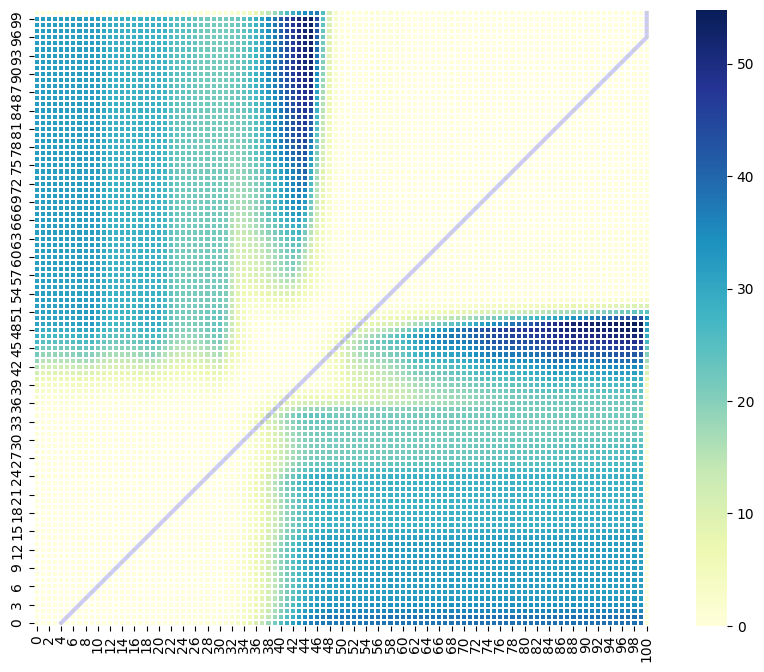

In [50]:
import seaborn as sbn
# Отрисуем матрицы весов расстояний Ts1 и Ts3 

cost_matrix = s1[2]
warp_path = s1[1]

fig, ax = plt.subplots(figsize=(12, 8))
ax = sbn.heatmap(cost_matrix, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()


path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=3, alpha=0.2)

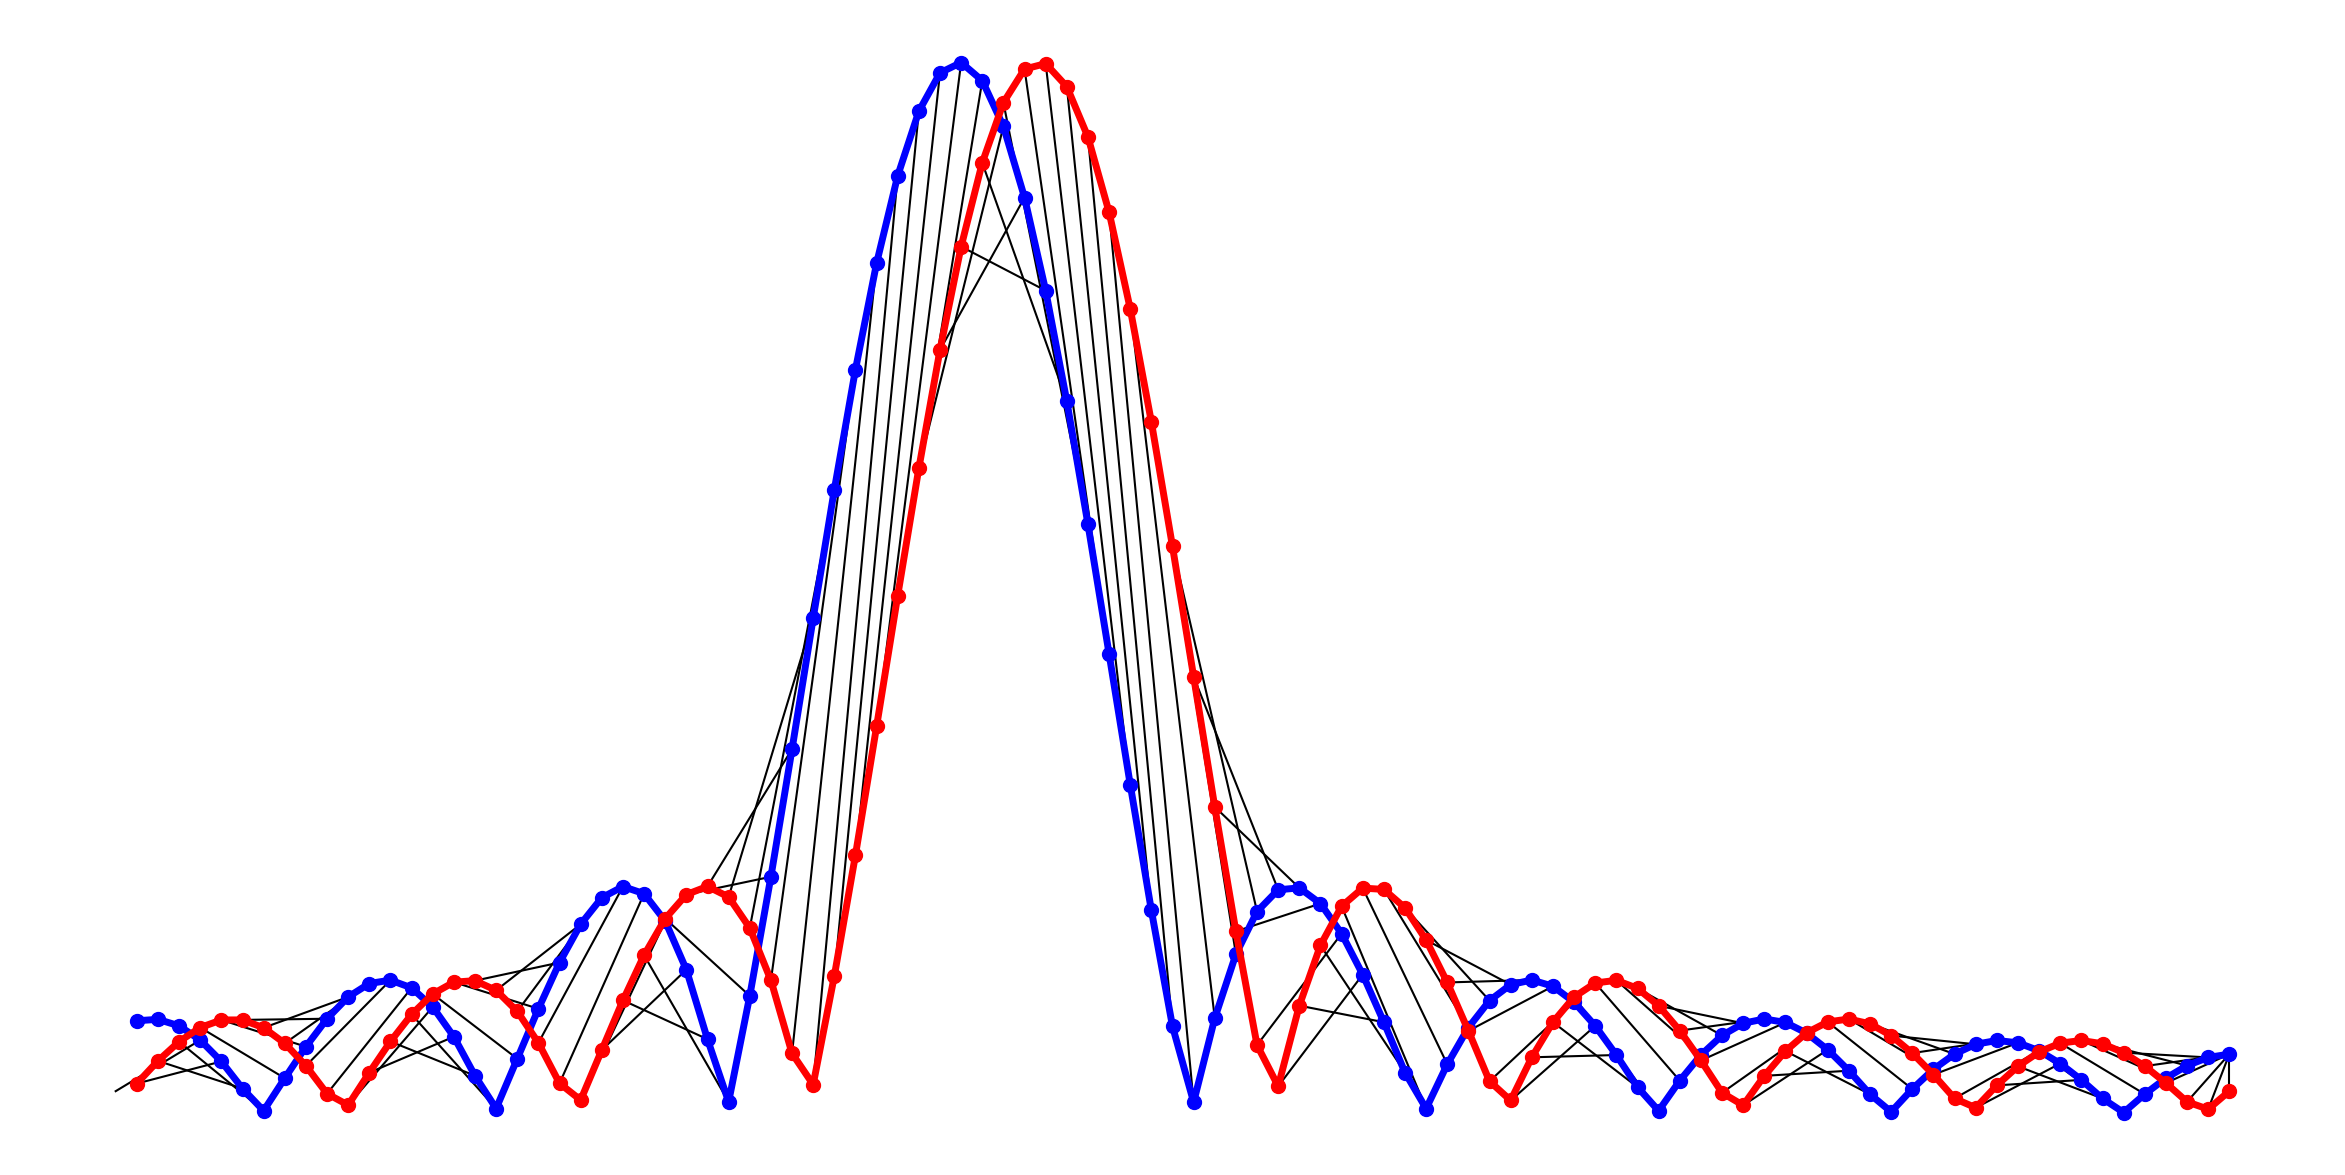

In [54]:
fig, ax = plt.subplots(figsize=(30, 15))


warp_path = s1[1]
x1 = x
x2 = x_s

# Remove the border and axes ticks
fig.patch.set_visible(True)
ax.axis('off')

for [map_x, map_y] in warp_path:   
    ax.set_facecolor('white')
    ax.plot([map_x-1, map_y-1], [x1[map_x-1], x2[map_y-1]], '-k')

ax.plot(x1, color='blue', marker='o', markersize=10, linewidth=5)
ax.plot(x2, color='red', marker='o', markersize=10, linewidth=5)
ax.tick_params(axis="both", which="major", labelsize=18)

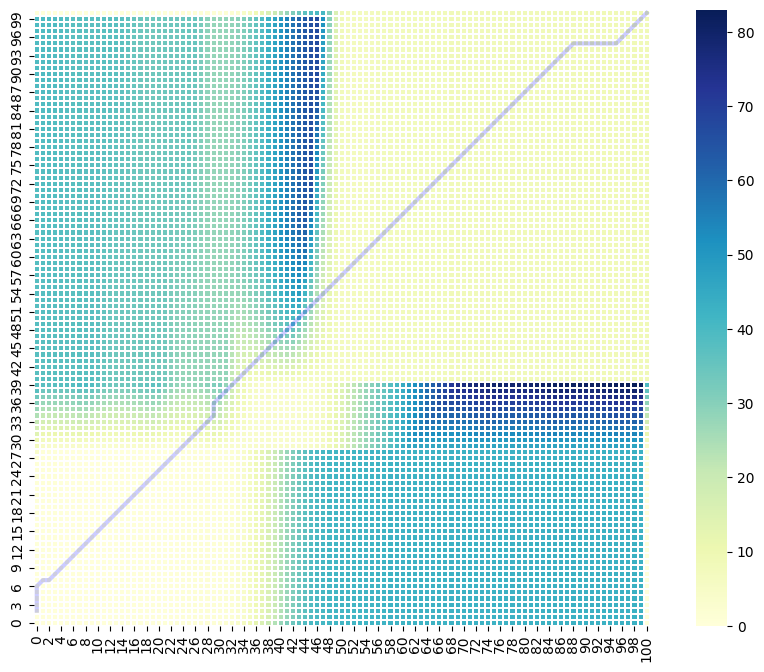

In [55]:
# Отрисуем матрицы весов расстояний Ts1 и Tp1

cost_matrix = s2[2]
warp_path = s2[1]

fig, ax = plt.subplots(figsize=(12, 8))
ax = sbn.heatmap(cost_matrix, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()


path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=3, alpha=0.2)

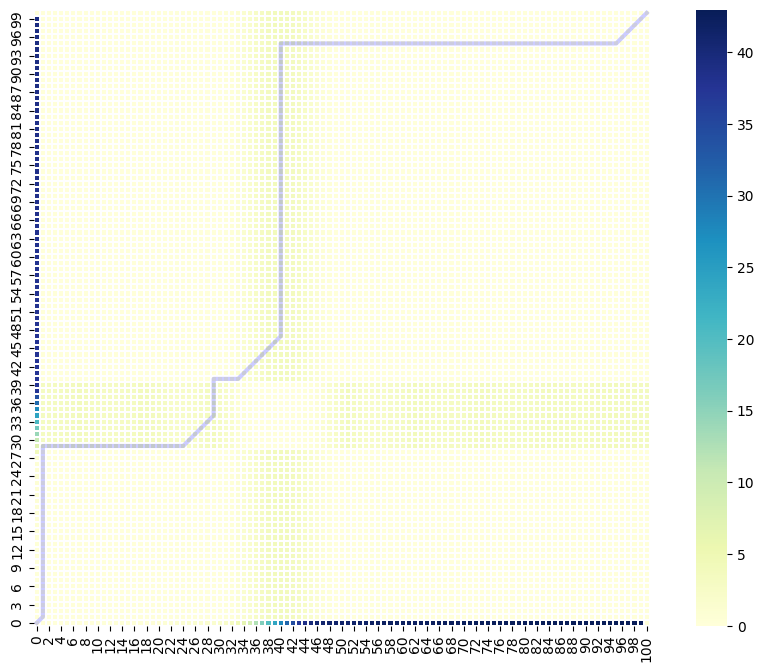

In [56]:
# Отрисуем матрицы весов расстояний Ts1 и Tp1 без DTW

cost_matrix = s21[2]
warp_path = s21[1]

fig, ax = plt.subplots(figsize=(12, 8))
ax = sbn.heatmap(cost_matrix, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
ax.invert_yaxis()


path_x = [p[0] for p in warp_path]
path_y = [p[1] for p in warp_path]

# Align the path from the center of each cell
path_xx = [x+0.5 for x in path_x]
path_yy = [y+0.5 for y in path_y]

ax.plot(path_xx, path_yy, color='blue', linewidth=3, alpha=0.2)

А теперь попробуем вычислить тоже самое, но с помощью встроенных функций Python

In [57]:
from dtaidistance import dtw

x = np.abs(tseries_list["Ts1"])
x_s = np.abs(tseries_list["Ts6"])


distance, paths = dtw.warping_paths(x, x_s)
print(distance)
print(paths)

0.2590355632777253
[[0.                inf        inf ...        inf        inf        inf]
 [       inf 0.11926185 0.14155982 ... 5.66601739 5.66850806 5.67008612]
 [       inf 0.17056793 0.1430219  ... 5.6554008  5.65797638 5.65962138]
 ...
 [       inf 6.21680728 5.99999944 ... 0.24975023 0.25397622 0.24091416]
 [       inf 6.21700509 6.00000307 ... 0.26017707 0.26841798 0.24929509]
 [       inf 6.21725607 6.00001685 ... 0.26673856 0.28042399 0.25903556]]


(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

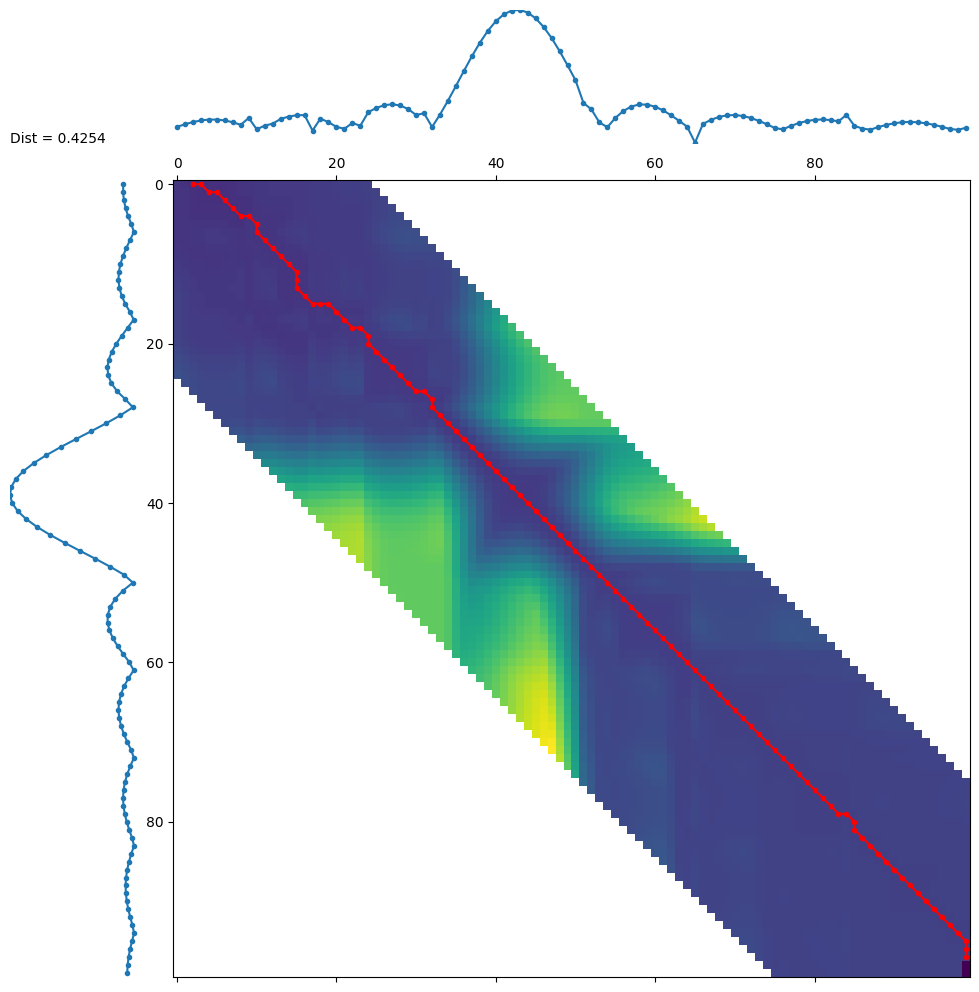

In [38]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
xw = np.arange(0, 20, .5)
s1 = x
s2 = x_s
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [58]:
x = np.abs(tseries_list["Ts1"])
x_p = np.abs(tseries_list["Tp2"])


distance, paths = dtw.warping_paths(x, x_p)
print(distance)
print(paths)

2.981562040382824
[[0.                inf        inf ...        inf        inf        inf]
 [       inf 0.17922046 0.253456   ... 6.26594424 6.26850677 6.27106826]
 [       inf 0.2553587  0.2553587  ... 6.26193797 6.26457942 6.26721975]
 ...
 [       inf 6.55428597 6.55428597 ... 2.97729671 2.97730083 2.97730495]
 [       inf 6.55520148 6.55520148 ... 2.97930747 2.97931158 2.9793157 ]
 [       inf 6.55622461 6.55622461 ... 2.98155382 2.98155793 2.98156204]]


(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

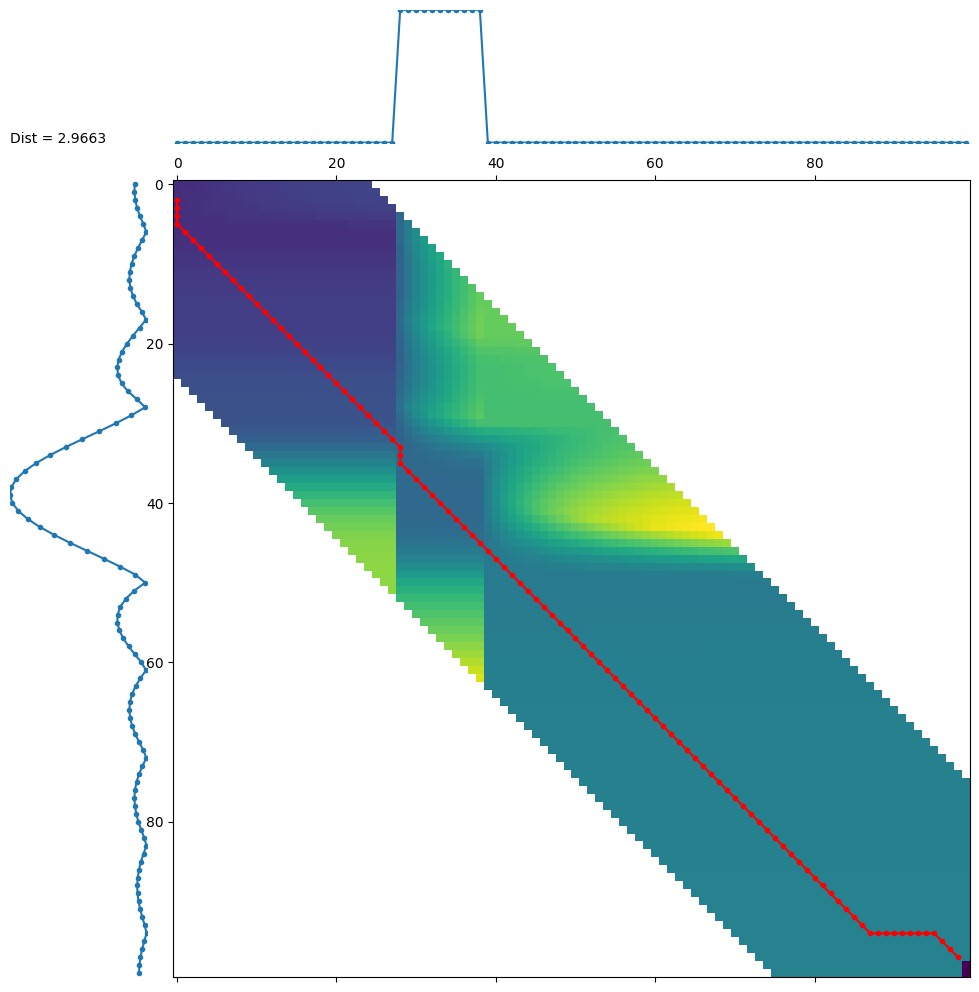

In [59]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np
xw = np.arange(0, 20, .5)
s1 = x
s2 = x_p
random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [60]:
# переделываем датасет так, чтобы с ним можно было бы работать

x = []  #значения
Y = []  # целевая переменная

for v in tseries_list:
    if v!= 'Time':
        x.append(tseries_list[v])
        c = v[:-1]
        if c == "Ts":
            Y.append(0)
        elif c == "Tc":
            Y.append(1)
        else: Y.append(2)


arr = np.arange(len(Y))
np.random.shuffle(arr)


print(Y)

X_train = []
X_test = []
y_train = []
y_test = []

for i in arr[:-5]:
    X_train.append(x[i])
    y_train.append(Y[i])

for i in arr[len(X_train):]:
    X_test.append(x[i])
    y_test.append(Y[i])


[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2]


In [61]:
from pyts.classification import KNeighborsClassifier

clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 2


In [62]:

import numpy as np 
from pyts.classification import TimeSeriesForest
import matplotlib.pyplot as plt

 
clf = TimeSeriesForest(random_state=43)
clf.fit(X_train, y_train)


print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")


Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.044 0.09  0.866]]
Истинный класс для предсказаний 2
